 Annualizing Mean Return and Std of Returns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format

In [4]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])

In [6]:
msft

,Price,Returns
Date,,
2014-10-01 00:00:00+00:00,45.900002,NaN
2014-10-02 00:00:00+00:00,45.759998,-0.003050
2014-10-03 00:00:00+00:00,46.090000,0.007212
2014-10-06 00:00:00+00:00,46.090000,0.000000
2014-10-07 00:00:00+00:00,45.529999,-0.012150
...,...,...
2021-05-24 00:00:00+00:00,250.779999,0.022882
2021-05-25 00:00:00+00:00,251.720001,0.003748
2021-05-26 00:00:00+00:00,251.490005,-0.000914


In [8]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift())
msft

,Price,Returns,log_ret
Date,,,
2014-10-01 00:00:00+00:00,45.900002,NaN,NaN
2014-10-02 00:00:00+00:00,45.759998,-0.003050,-0.003055
2014-10-03 00:00:00+00:00,46.090000,0.007212,0.007186
2014-10-06 00:00:00+00:00,46.090000,0.000000,0.000000
2014-10-07 00:00:00+00:00,45.529999,-0.012150,-0.012225
...,...,...,...
2021-05-24 00:00:00+00:00,250.779999,0.022882,0.022624
2021-05-25 00:00:00+00:00,251.720001,0.003748,0.003741
2021-05-26 00:00:00+00:00,251.490005,-0.000914,-0.000914


In [10]:
msft.log_ret.agg(["mean", "std"])

mean   0.001011
std    0.017249
Name: log_ret, dtype: float64

In [12]:
ann_mu = msft.log_ret.mean() * 252
ann_mu

0.25466357960390723

In [14]:
cagr = np.exp(ann_mu) - 1
cagr

0.29002755628143806

In [16]:
msft.log_ret.agg(["mean", "std"])

mean   0.001011
std    0.017249
Name: log_ret, dtype: float64

In [18]:
ann_mu = msft.log_ret.mean()
ann_mu

0.0010105697603329652

In [20]:
cagr = np.exp(ann_mu) - 1
cagr

0.0010110805580043625

In [24]:
ann_std = msft.log_ret.std() * np.sqrt(252)
ann_std

0.27381663717464577

In [27]:
ann_std = np.sqrt(msft.log_ret.var() * 252)
ann_std

0.27381663717464577

Resampling / Smoothing

In [30]:
msft.head(25)

,Price,Returns,log_ret
Date,,,
2014-10-01 00:00:00+00:00,45.900002,NaN,NaN
2014-10-02 00:00:00+00:00,45.759998,-0.003050,-0.003055
2014-10-03 00:00:00+00:00,46.090000,0.007212,0.007186
2014-10-06 00:00:00+00:00,46.090000,0.000000,0.000000
2014-10-07 00:00:00+00:00,45.529999,-0.012150,-0.012225
2014-10-08 00:00:00+00:00,46.779999,0.027454,0.027084
2014-10-09 00:00:00+00:00,45.849998,-0.019880,-0.020081
2014-10-10 00:00:00+00:00,44.029999,-0.039695,-0.040504
2014-10-13 00:00:00+00:00,43.650002,-0.008630,-0.008668


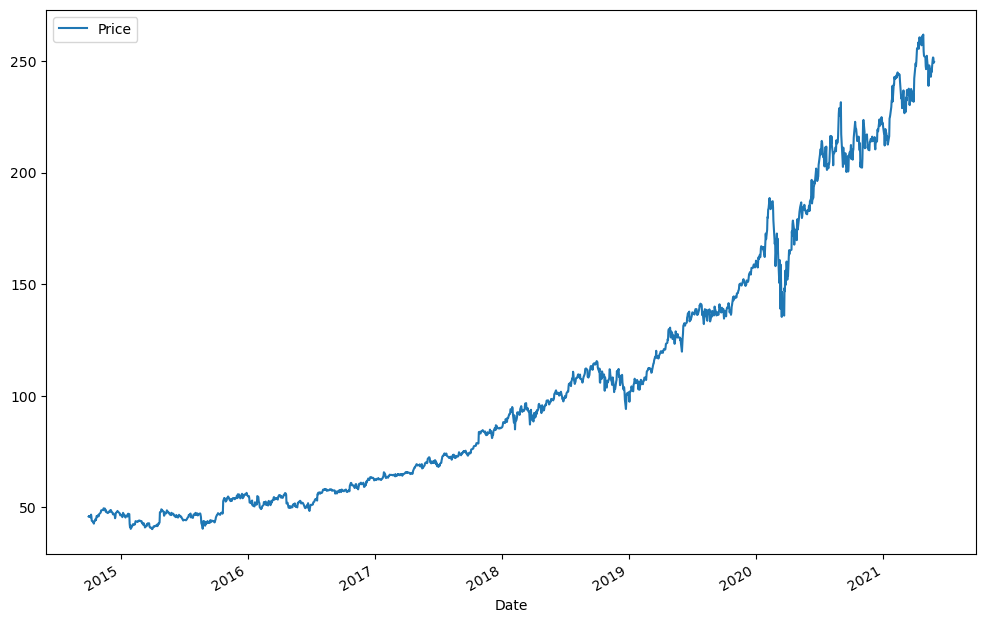

In [32]:
msft.Price.plot(figsize = (12, 8))
plt.legend()
plt.show()

In [34]:
monthly = msft.Price.resample("M").last()
monthly

C:\Users\audri\AppData\Local\Temp\ipykernel_15852\2852034256.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = msft.Price.resample("M").last()


Date
2014-10-31 00:00:00+00:00    46.950001
2014-11-30 00:00:00+00:00    47.810001
2014-12-31 00:00:00+00:00    46.450001
2015-01-31 00:00:00+00:00    40.400002
2015-02-28 00:00:00+00:00    43.849998
                               ...    
2021-01-31 00:00:00+00:00   231.960007
2021-02-28 00:00:00+00:00   232.380005
2021-03-31 00:00:00+00:00   235.770004
2021-04-30 00:00:00+00:00   252.179993
2021-05-31 00:00:00+00:00   249.679993
Freq: ME, Name: Price, Length: 80, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

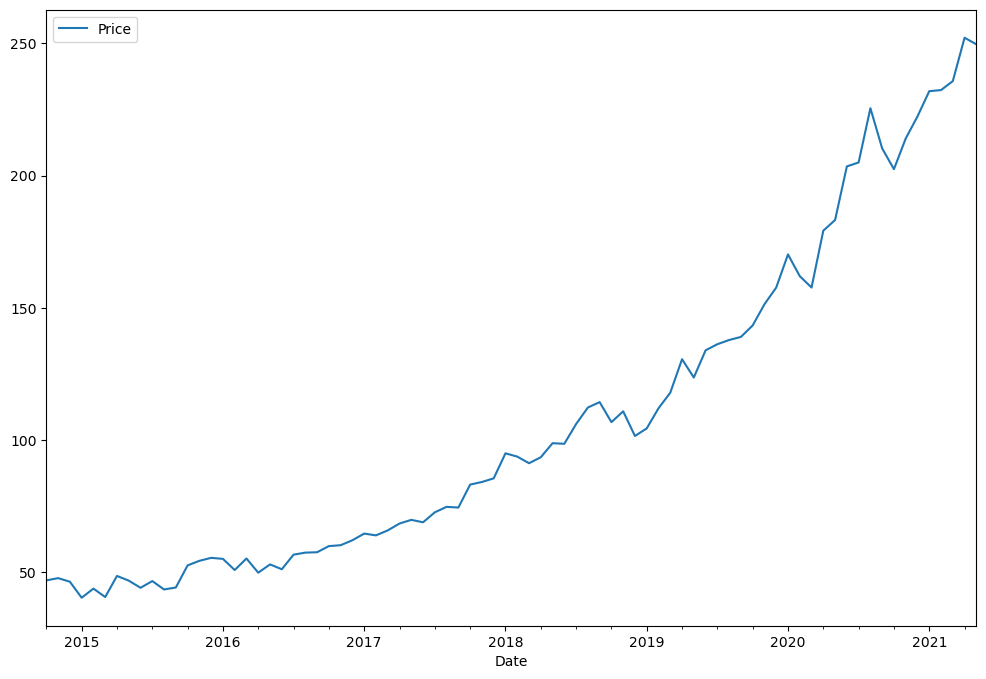

In [36]:
monthly.plot(figsize = (12, 8))
plt.legend()
plt.show

How will the Mean-Varience Analysis change with smoothed data?

In [67]:
freqs = ["YE", "QE", "ME", "W-Fri", "D"]
periods = [1, 2, 12, 52, 252]
ann_mean = []
ann_std = []

In [69]:
for i in range(5):
    resamp = msft.Price.resample(freq[i]).last()
    ann_mean.append(np.log(resamp / resamp.shift()).mean() * periods[i])
    ann_std.append(np.log(resamp / resamp.shift()).std() * np.sqrt(periods[i]))

In [71]:
ann_mean

[0.24025765527761314,
 0.1293695066879455,
 0.253837495704879,
 0.253194152871532,
 0.25289038013157555]

In [73]:
ann_std

[0.12724981752067244,
 0.12679409432574146,
 0.20496983822390324,
 0.2308593150008498,
 0.26737210972009995]

In [77]:
summary = pd.DataFrame(data = {"ann_std":ann_std, "ann_mean":ann_mean}, index = freqs)
summary

,ann_std,ann_mean
YE,0.127250,0.240258
QE,0.126794,0.129370
ME,0.204970,0.253837
W-Fri,0.230859,0.253194
D,0.267372,0.252890


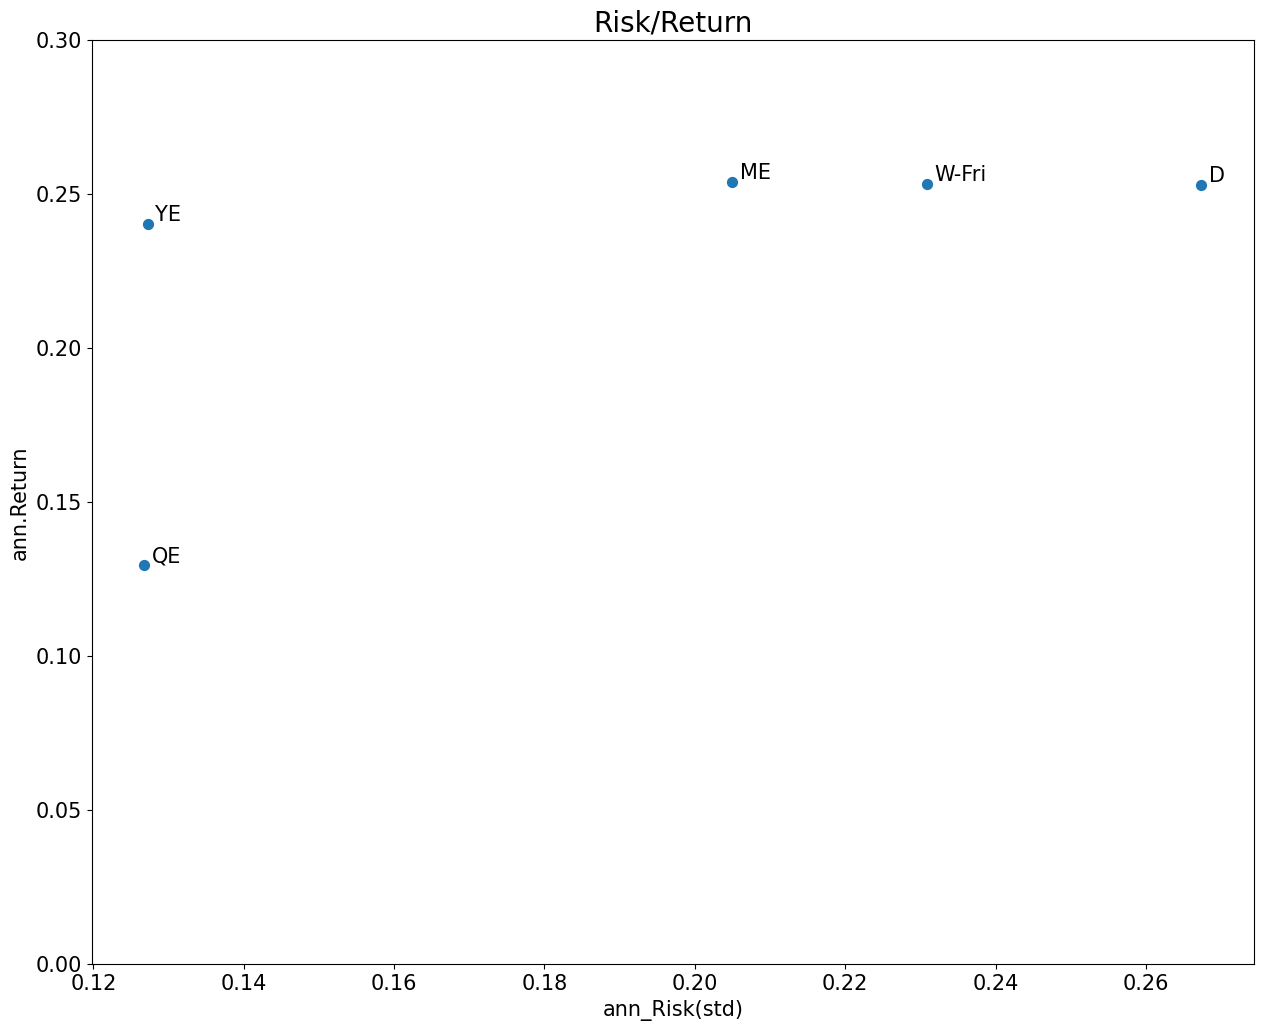

In [81]:
summary.plot(kind = "scatter", x = "ann_std", y = "ann_mean", figsize = (15, 12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann_std"] + 0.001, summary.loc[i, "ann_mean"] + 0.001), size = 15)
plt.ylim(0, 0.3)
plt.xlabel("ann_Risk(std)", fontsize = 15)
plt.ylabel("ann.Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()